In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
d =pd.read_csv("Real.csv")
d.info(memory_usage='deep')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930621 entries, 0 to 930620
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     930621 non-null  int64  
 1   List Year         930621 non-null  int64  
 2   Date Recorded     930619 non-null  object 
 3   Town              930621 non-null  object 
 4   Address           930570 non-null  object 
 5   Assessed Value    930621 non-null  float64
 6   Sale Amount       930621 non-null  float64
 7   Sales Ratio       930621 non-null  float64
 8   Property Type     925733 non-null  object 
 9   Residential Type  548176 non-null  object 
 10  Non Use Code      275231 non-null  object 
 11  Assessor Remarks  135512 non-null  object 
 12  OPM remarks       7946 non-null    object 
 13  Location          680517 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 484.7 MB


In [4]:
print ("this dataset represents Maryland's total residential sales from 2002 to 2018.")
print("")
print ("our model purpose is - given the year the real estate was sold,the city it was sold in and the price it sold for,the model will predict the proprety type varying between:Condo,V,R,Single Family and Two Family.")



this dataset represents Maryland's total residential sales from 2002 to 2018.

our model purpose is - given the year the real estate was sold,the city it was sold in and the price it sold for,the model will predict the proprety type varying between:Condo,V,R,Single Family and Two Family.


In [5]:
print("we decided to ignore all the colums besides: Town, List Year,Sale Amount and Property Typem.")
print ("because we belive they are irelevent for our model and our data frame was too big.")


we decided to ignore all the colums besides: Town, List Year,Sale Amount and Property Typem.
because we belive they are irelevent for our model and our data frame was too big.


In [6]:
cols=['List Year','Town','Sale Amount','Property Type']
df=pd.read_csv("Real.csv",usecols=cols)

In [7]:
df.isna().sum()

List Year           0
Town                0
Sale Amount         0
Property Type    4888
dtype: int64

In [8]:
print("because our dataframe is so big and the NaN value are so small compared to it we can drop all the nan values and make our model on the smaller dataframe.")
n=df.dropna()

because our dataframe is so big and the NaN value are so small compared to it we can drop all the nan values and make our model on the smaller dataframe.


In [9]:
n.isna().sum()

List Year        0
Town             0
Sale Amount      0
Property Type    0
dtype: int64

In [10]:
n

,List Year,Town,Sale Amount,Property Type
0,2019,Ansonia,284000.0,Single Family
1,2019,Avon,173800.0,Condo
2,2019,Avon,317500.0,Single Family
3,2019,Beacon Falls,229900.0,Single Family
4,2019,Bethany,560000.0,Single Family
...,...,...,...,...
930616,2018,Stamford,214350.0,Residential
930617,2018,West Hartford,176000.0,Residential
930618,2018,Stafford,37000.0,Commercial
930619,2018,Ridgefield,725000.0,Residential


In [11]:
n=n.rename({'List Year':'List_Year','Sale Amount':'Sale_Amount','Property Type':'Property_Type'},axis='columns')

In [12]:
dn=n[(n.Property_Type== 'Single Family')|(n.Property_Type== 'Two Family')|(n.Property_Type== 'R')|(n.Property_Type== 'V')|(n.Property_Type== 'Condo')]

In [13]:
print("we sorted the dataframe to the new dataframe dn,this data only have the wanted property types,this data also have no NaN           values.")

we sorted the dataframe to the new dataframe dn,this data only have the wanted property types,this data also have no NaN           values.


In [14]:
dn.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367627 entries, 0 to 391012
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   List_Year      367627 non-null  int64  
 1   Town           367627 non-null  object 
 2   Sale_Amount    367627 non-null  float64
 3   Property_Type  367627 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 52.3 MB


In [15]:
dn

,List_Year,Town,Sale_Amount,Property_Type
0,2019,Ansonia,284000.0,Single Family
1,2019,Avon,173800.0,Condo
2,2019,Avon,317500.0,Single Family
3,2019,Beacon Falls,229900.0,Single Family
4,2019,Bethany,560000.0,Single Family
...,...,...,...,...
391008,2005,Windsor Locks,222000.0,R
391009,2005,Norwich,182000.0,R
391010,2005,Waterford,220000.0,R
391011,2005,Woodbury,230000.0,R


In [16]:
Rv=(dn.Property_Type=='R').sum()
Vv=(dn.Property_Type=='V').sum()
SFv=(dn.Property_Type=='Single Family').sum()
TFv=(dn.Property_Type=='Two Family').sum()
Cv=(dn.Property_Type=='Condo').sum()

TOTALv=367627

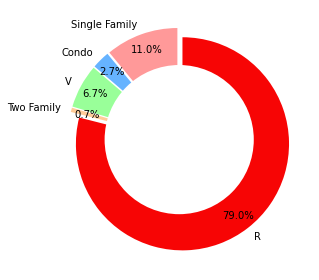

In [17]:
# Pie chart-for the diffrent property types
labels = ['Single Family', 'Condo', 'V','Two Family', 'R']
sizes = [SFv/TOTALv, Cv/TOTALv,Vv/TOTALv, TFv/TOTALv,Rv/TOTALv]

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#f70505']

explode = (0.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

  
plt.tight_layout()
plt.show()


In [17]:
#to do list:
    #choose matrix for ranking the model-accuracy scoring
    # regression somthing idk- 
    # split the data to train and test parts
    # scale the dat of the train and the test separatly
    # analayze the data-coorolation between diffrent variabls-lil summ of cunclusion
    #smote the data
    #choose dummy model that best fit your dataframe
    # choose diffrent models and try them on the project-try to imporve as much as possible
    # choose the model that preformed the best at the given task and let him try the test.